In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pathlib import Path
%matplotlib inline
plt.style.use('seaborn')

In [3]:
!ls PriceData/

Coinbase_BTCUSD_1h.csv Coinbase_LTCUSD_1h.csv
Coinbase_ETHUSD_1h.csv NORM


# Dataset Creation 

### Loading all the frames in 

In [4]:
DATA = Path('./PriceData')
btc = pd.read_csv(DATA / 'Coinbase_BTCUSD_1h.csv')
eth = pd.read_csv(DATA / 'Coinbase_ETHUSD_1h.csv')
ltc = pd.read_csv(DATA / 'Coinbase_LTCUSD_1h.csv')

In [5]:
eth.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To
0,2018-07-30 10-PM,ETHUSD,453.00,455.34,452.69,455.34,1346.24,611621.82
1,2018-07-30 09-PM,ETHUSD,453.73,453.86,452.60,453.00,1409.44,638643.25
2,2018-07-30 08-PM,ETHUSD,452.78,454.45,451.47,453.73,2591.56,1173645.99
3,2018-07-30 07-PM,ETHUSD,449.47,454.36,449.04,452.78,3633.77,1641889.82
4,2018-07-30 06-PM,ETHUSD,448.64,449.69,446.00,449.47,3928.43,1760476.79


## Creating a simple normalized dataset

In [6]:
# each column is normalized like (x - mean) / stdev
norm = [df.copy() for df in [btc, eth, ltc]]
for idx, df in enumerate([btc, eth, ltc]):
    for column in df.columns:
        values = df[column].values
        if np.issubdtype(values.dtype, np.number):
            mean = np.mean(values)
            stdev = np.std(values)
            norm[idx][column] = (values - mean) / stdev 
            
            

[Text(0,0.5,'Normalized Closing Price'),
 Text(0.5,0,'Hours'),
 Text(0.5,1,'Normalized Prices')]

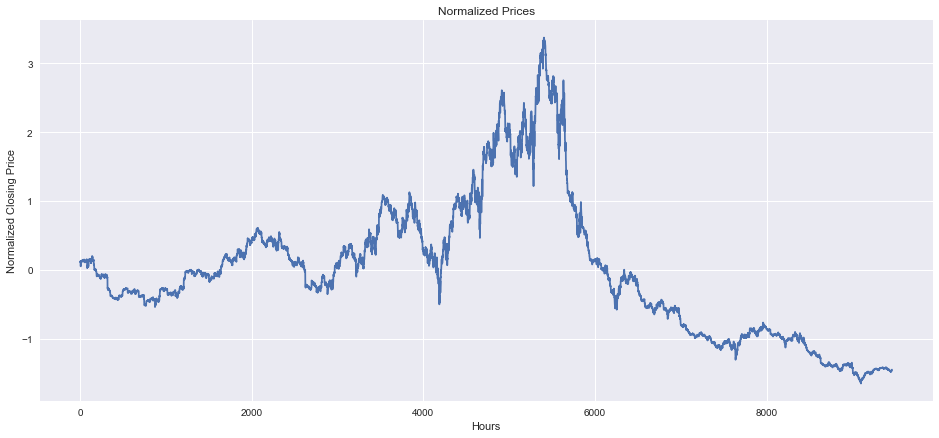

In [7]:
# lets visualise
norm_prices = norm[0]['Close'].values
fig, axes = plt.subplots(figsize=(16,7))
axes.plot(norm_prices)
axes.set(title='Normalized Prices',xlabel='Hours',ylabel='Normalized Closing Price')

In [8]:
norm_dir = DATA / 'NORM'
norm_dir.mkdir(exist_ok=True)

norm[0].to_csv(norm_dir / 'btc_simple_norm.csv')
norm[1].to_csv(norm_dir / 'eth_simple_norm.csv')
norm[2].to_csv(norm_dir / 'ltc_simple_norm.csv')

## Creating a stationary series dataset 

In [9]:
stat_series = [df.copy() for df in [btc, eth, ltc]]
for df in stat_series:
    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):
            df[column] = df[column].apply(np.log)
            df[column] = df[column].diff()
            

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/algorithms.py:1547: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


[Text(0,0.5,'Stationary Closing Price'),
 Text(0.5,0,'Hours'),
 Text(0.5,1,'Stationary Series')]

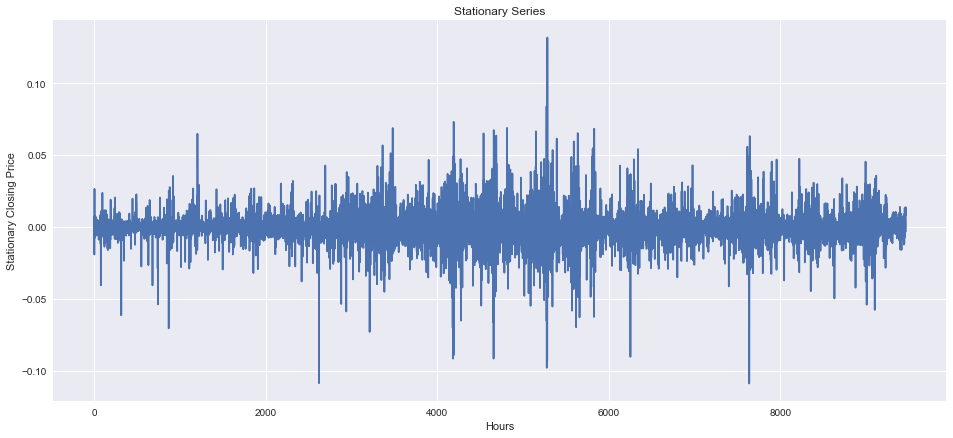

In [10]:
# lets visualize
# lets visualise
stat_prices = stat_series[0]['Close'].values
fig, axes = plt.subplots(figsize=(16,7))
axes.plot(stat_prices)
axes.set(title='Stationary Series', xlabel='Hours', ylabel='Stationary Closing Price')

In [11]:
stat_series[0].to_csv(norm_dir / 'btc_stat_series.csv')
stat_series[1].to_csv(norm_dir / 'eth_stat_series.csv')
stat_series[2].to_csv(norm_dir / 'ltc_stat_series.csv')

## Lets see what we get when we apply both types 

In [12]:
both = [df.copy() for df in stat_series]
for idx, df in enumerate(both):
    for column in df.columns:
        values = df[column].values
        if np.issubdtype(values.dtype, np.number):
            mean = np.mean(values)
            stdev = np.std(values)
            norm[idx][column] = (values - mean) / stdev 
            

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:102: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


[Text(0,0.5,'Stationary Closing Price'),
 Text(0.5,0,'Hours'),
 Text(0.5,1,'Stationary Series')]

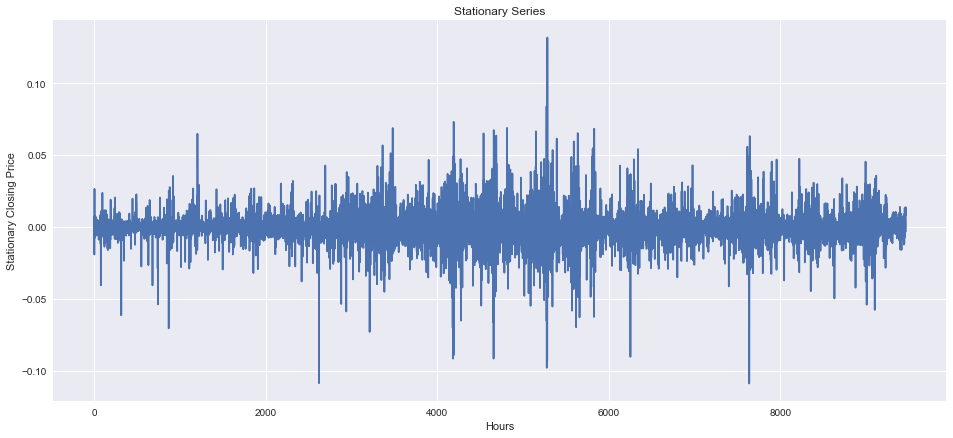

In [13]:
stat_prices = both[0]['Close'].values
fig, axes = plt.subplots(figsize=(16,7))
axes.plot(stat_prices)
axes.set(title='Stationary Series', xlabel='Hours', ylabel='Stationary Closing Price')